In [1]:
import pandas as pd 
data_17_18 = pd.read_csv('/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/DatasetsOriginais/transfermarkt/transfermarkt_fbref_201718.csv', delimiter = ';',  index_col=0)
data_18_19 = pd.read_csv('/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/DatasetsOriginais/transfermarkt/transfermarkt_fbref_201819.csv', delimiter = ';',  index_col=0,  low_memory=False)
data_19_20 = pd.read_csv('/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/DatasetsOriginais/transfermarkt/transfermarkt_fbref_201920.csv', delimiter = ';',  index_col=0)


In [2]:
# Concatenate the DataFrames vertically
data = pd.concat([data_17_18, data_18_19, data_19_20], ignore_index=True)

In [3]:
data_17_18['season_year'] = 2018
data_18_19['season_year'] = 2019
data_19_20['season_year'] = 2020

In [4]:
data = data.drop('Season', axis=1)
data = data.drop('Attendance', axis=1)


# Extract country code from the nationality column
data['nationality'] = data['nationality'].str[-3:]

data = data.dropna()

null_counts = data.isnull().sum()
print(null_counts)

data.shape[0]

player          0
nationality     0
position        0
squad           0
age             0
               ..
xGDiff          0
xGDiff/90       0
CL              0
WinCL           0
CLBestScorer    0
Length: 397, dtype: int64


6409

In [5]:
#Criar os bins

import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Defina os limites dos intervalos
limites = [0, 5e6, 10e6, 15e6, 20e6, 25e6, 50e6, 75e6, 100e6, float('inf')]

# Defina os rótulos dos intervalos
rotulos = ['1 - 0-5', '2 - 5-10', '3 - 10-15', '4 - 15-20', '5 - 20-25', '6 - 25-50', '7 - 50-75', '8 - 75-100', '9 - 100+']

# Crie a nova coluna "bins" usando pd.cut()
data['bins'] = pd.cut(data['value'], bins=limites, labels=rotulos)

# Converta a coluna "bins" em uma variável categórica
label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['bins'])

# Exiba o DataFrame resultante
print(data)

# DEBUG

limite = 125e6  # Limite de valor

# Encontrar a linha que atende aos critérios
linha = data.loc[data['value'] > limite]

# Imprimir a linha encontrada
print(linha)


#data = data[data['target'] != 8].copy()





              player nationality position        squad   age  birth_year  \
0             Burgui         ESP    FW,MF       Alavés  23.0      1993.0   
1     Raphaël Varane         FRA       DF  Real Madrid  24.0      1993.0   
2       Rubén Duarte         ESP       DF       Alavés  21.0      1995.0   
3      Samuel Umtiti         FRA       DF    Barcelona  23.0      1993.0   
4        Manu García         ESP       MF       Alavés  31.0      1986.0   
...              ...         ...      ...          ...   ...         ...   
6691   Ryan Bertrand         ENG       DF  Southampton  29.0      1989.0   
6692  Sofiane Boufal         MAR    MF,FW  Southampton  25.0      1993.0   
6693     Kevin Danso         AUT       DF  Southampton  20.0      1998.0   
6694  Moussa Djenepo         MLI    MF,DF  Southampton  21.0      1998.0   
6695      Angus Gunn         ENG       GK  Southampton  23.0      1996.0   

           value  height                      position2   foot  ... Pts/G  \
0      180

In [6]:
# correlação

# Selecione apenas as colunas numéricas

colunas_numericas = data.select_dtypes(include=[float, int])

# Calcule a correlação entre as variáveis numéricas e a variável alvo
correlacao = colunas_numericas.corrwith(data['target'])

# Criar uma lista para armazenar as colunas a serem removidas
colunas_removidas = []

for coluna in colunas_numericas.columns:
    correlacao_valor = correlacao[coluna]
    #print(f"Coluna: {coluna}, Correlação: {correlacao_valor}")
    
    # Verificar se a correlação é negativa
    if correlacao_valor < 0.3:
        colunas_removidas.append(coluna)

# Remover as colunas com correlação negativa do DataFrame
data = data.drop(colunas_removidas, axis=1)

for coluna in colunas_numericas.columns:
    correlacao_valor = correlacao[coluna]
    print(f"Coluna: {coluna}, Correlação: {correlacao_valor}")

data.to_csv("merged_class.csv", index = False)

Coluna: age, Correlação: -0.14414711955469395
Coluna: birth_year, Correlação: 0.02976237254943201
Coluna: value, Correlação: 0.9017182833803945
Coluna: height, Correlação: 0.0007944461254512918
Coluna: games, Correlação: 0.4022379138093954
Coluna: games_starts, Correlação: 0.40065355887737814
Coluna: minutes, Correlação: 0.3994051439455192
Coluna: goals, Correlação: 0.45919398958769964
Coluna: assists, Correlação: 0.4583153571489653
Coluna: pens_made, Correlação: 0.2021517133434917
Coluna: pens_att, Correlação: 0.2085396541489325
Coluna: cards_yellow, Correlação: 0.16258420956481504
Coluna: cards_red, Correlação: 0.029535158252995183
Coluna: goals_per90, Correlação: 0.1385857058328107
Coluna: assists_per90, Correlação: 0.24711369073868675
Coluna: goals_assists_per90, Correlação: 0.20394827462538762
Coluna: goals_pens_per90, Correlação: 0.12878040410855543
Coluna: goals_assists_pens_per90, Correlação: 0.19660559648726755
Coluna: xg, Correlação: 0.4458990422504927
Coluna: npxg, Correlaçã

In [7]:
data.head()

,player,nationality,position,squad,value,position2,foot,league,games,games_starts,...,GF,GDiff,Pts,Pts/G,xG,xGDiff,xGDiff/90,CL,bins,target
0,Burgui,ESP,"FW,MF",Alavés,1800000.0,attack - Left Winger,right,La Liga,23.0,12.0,...,40.0,-10.0,47.0,1.24,39.0,-14.2,-0.37,0.0,1 - 0-5,0
1,Raphaël Varane,FRA,DF,Real Madrid,70000000.0,Defender - Centre-Back,right,La Liga,27.0,27.0,...,94.0,50.0,76.0,2.00,83.3,37.9,1.00,1.0,7 - 50-75,6
2,Rubén Duarte,ESP,DF,Alavés,2000000.0,Defender - Left-Back,left,La Liga,24.0,24.0,...,40.0,-10.0,47.0,1.24,39.0,-14.2,-0.37,0.0,1 - 0-5,0
3,Samuel Umtiti,FRA,DF,Barcelona,60000000.0,Defender - Centre-Back,left,La Liga,25.0,24.0,...,99.0,70.0,93.0,2.45,78.3,37.2,0.98,1.0,7 - 50-75,6
4,Manu García,ESP,MF,Alavés,1800000.0,midfield - Defensive Midfield,left,La Liga,30.0,27.0,...,40.0,-10.0,47.0,1.24,39.0,-14.2,-0.37,0.0,1 - 0-5,0


In [8]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error

dataset = pd.read_csv('/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/Scripts and Notebooks/merged_class.csv')

dropped = dataset.drop(['value','bins','target', 'squad'], axis=1)

#dropped.head()

import pandas as pd


# Criar um mapeamento global para a coluna "player"
player_mapping = dict(zip(dropped['player'].unique(), range(len(dropped['player'].unique()))))
nationality_mapping = dict(zip(dropped['nationality'].unique(), range(len(dropped['nationality'].unique()))))
league_mapping = dict(zip(dropped['league'].unique(), range(len(dropped['league'].unique()))))


# Aplicar a codificação ordinal para as colunas "nationality" e "league"
dropped['nationality_encoded'] = dropped['nationality'].map(nationality_mapping)
dropped['league_encoded'] = dropped['league'].map(league_mapping)
dropped['player_encoded'] = dropped['player'].map(player_mapping)


dropped = dropped.drop(['player', 'nationality', 'league', 'position', 'position2','foot'], axis=1)

# Visualizar o DataFrame com a coluna codificada
dropped.head()

dropped.to_csv("debug.csv", index = False)


In [9]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error

dataset = pd.read_csv('/home/antoniolmf/Documentos/md/tp/Data-Mining-TP/Scripts and Notebooks/merged_class.csv')

dropped = dataset.drop(['value','bins','target'], axis=1)

# Select the relevant features and target variable
features_scale = dropped.drop(['player', 'nationality', 'position', 'squad', 'position2', 'foot', 'league'], axis=1)
features_encode = dropped[[ 'player', 'nationality', 'position', 'squad', 'position2', 'foot', 'league']]
target = dataset['target']

# Preprocess the scaled features
scaled_features = features_scale.apply(pd.to_numeric, errors='coerce').values
scaled_features = np.nan_to_num(scaled_features)

# One-hot encode the categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(features_encode).toarray()

# Concatenate the scaled features and encoded features
features = np.concatenate((scaled_features, encoded_features), axis=1)

dataset.head()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

accuracy: 62.32%
Matriz de Confusão:


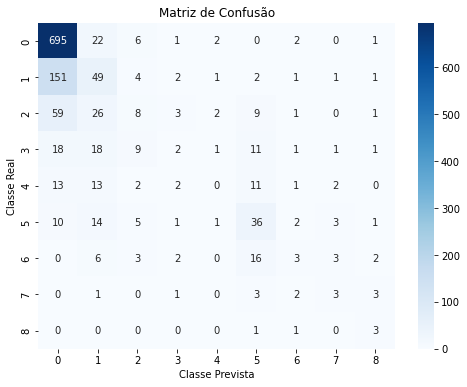

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt





# Criar o modelo de regressão logística
model = LogisticRegression(max_iter=1000,solver='liblinear')

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
print("Matriz de Confusão:")
#print(cm)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()




In [11]:

from sklearn.tree import DecisionTreeClassifier

# Criar o modelo de árvore de decisão
model = DecisionTreeClassifier()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

accuracy: 53.59%


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Criar o modelo de Random Forest
model = RandomForestClassifier(random_state=2022, n_estimators=200, max_depth=10, min_samples_split=5)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

accuracy: 59.75%


In [13]:
from sklearn.svm import SVC

# Criar o modelo SVM com hiperparâmetros personalizados
model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

accuracy: 57.18%


In [14]:
from xgboost import XGBClassifier

# Criar o modelo XGBoost com hiperparâmetros personalizados
model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state = 2022)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

for i in range(len(X_test)):
    # Fazer previsão para uma instância
    instance = X_test[i]
    y_pred = model.predict([instance])

    # Obter o valor verdadeiro correspondente
    y_true = y_test.iloc[i]

    # Imprimir a previsão e o valor verdadeiro
    print("Instância", i+1)
    print("Previsão:", y_pred[0])
    print("Valor Verdadeiro:", y_true)
    print()


# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: {:.2f}%".format(accuracy * 100))

/home/antoniolmf/anaconda3/envs/daa/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier(learning_rate=0.01, num_leaves=30, n_estimators=300)
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros a serem ajustados
param_grid = {
    'learning_rate': [0.1, 0.01],
    'num_leaves': [20, 30, 40],
    'n_estimators': [100, 200, 300]
}

# Criar o modelo LightGBM
model = lgb.LGBMClassifier()

# Criar o objeto GridSearchCV para realizar a pesquisa em grade
grid_search = GridSearchCV(model, param_grid, cv=3)

# Realizar a busca pelos melhores hiperparâmetros
grid_search.fit(X_train, y_train)

# Obter os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Imprimir os melhores hiperparâmetros encontrados
print("Best Parameters:", best_params)

# Obter o modelo com os melhores hiperparâmetros
best_model = grid_search.best_estimator_

# Fazer previsões com o melhor modelo
y_pred = best_model.predict(X_test)

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
